# DỰ ĐOÁN BỆNH TIM

## Dàn bài
* [1. Đặt vấn đề](#introduction)
* [2. Giới thiệu về tập dữ liệu](#data)
* [3. Thống kê mô tả](#descriptive_statistics)  
  - [3.1 Giá trị thiếu](#missing_value)
  - [3.2.  Biến số mục tiêu (biến số phụ thuộc)](#describe_target_variable)
  - [3.3. Liên quan giữa các biên số phân loại với bệnh tim](#relationship_between_category_vs_target)
  - [3.4.  Liên quan giữa các biên số định lượng với bệnh tim](#relationship_between_numberic_vs_target)
  - [3.5. Tương quan giữa các biến số độc lập](#correlation_between_variables)
* [4. Tiền dữ lý dữ liệu](#preprocessing)  
  - [4.1. Lựa chọn biến số đưa vào mô hình](#feature_selection)
  - [4.2. Làm sạch dữ liệu](#data_cleaning)
  - [4.3. Chuẩn hóa dữ liệu](#data_normalization)
* [5. Xây dựng mô hình phân loại](#model_building)
  - [5.1. Các thuật toán được lựa chọn](#ml_algorithm)
  - [5.2. Tiêu chuẩn đánh giá mô hình và phương pháp xây dựng mô hình](#evaluation_criteria_and_method)
* [6. Đánh giá mô hình](#model_evaluation)
  - [6.1. Lựa chọn thuật toán](#choose_algorithm)
  - [6.2. Điều chỉnh ngưỡng phù hợp với tình hình thực tế](#adjust_threshold)
* [7. Kết luận](#conclusion)

## 1. Đặt vấn đề<a name="introduction"></a>

Bệnh tim mạch là các tình trạng rối loạn liên quan đến sự hoạt động của tim và mạch máu. Bệnh tim mạch bao gồm bệnh mạch vành (nhồi máu cơ tim), tai biến mạch máu não (đột quỵ), tăng huyết áp tăng (cao huyết áp), bệnh động mạch ngoại biên, bệnh thấp tim, bệnh tim bẩm sinh và suy tim.  

Bệnh tim là nguyên nhân hàng đầu gây tử vong trên toàn thế giới, nhiều hơn cả bệnh lý ung thư, dù là ở các nước đã hay đang phát triển. Mỗi năm trên thế giới có khoảng 17,5 triệu người tử vong do các bệnh tim tương đương với khoảng 30% tổng số ca tử vong trên thế giới. Tại Việt Nam ước tính có khoảng 20% dân số đang mắc các bệnh tim mạch và huyết áp.  

Bệnh tim thường được cho là chỉ gặp ở người lớn tuổi. Song trên thực tế, số người trẻ tuổi mắc bệnh tim mạch ngày càng nhiều, các chuyên gia nhận định những đối tượng có nguy cơ về bệnh tim đang có chiều hướng trẻ hóa do những thói quen thiếu lành mạnh trong sinh hoạt hàng ngày.  

Bệnh tim thường diễn biến thầm lặng nhưng lại gây ra những hậu quả nặng nề. Bệnh tim có khả năng phòng ngừa hiệu quả bằng cách điều chính lối sống phù hợp (như giảm sử dụng rượu bia, thuốc lá; ăn uống lành mạnh và tăng cường luyện tập thể dục thể thao).   

Sàng lọc và dự báo sớm bệnh tim giúp có phương án điều trị kịp thời trước khi quá muộn hoặc phương án dự phòng phù hợp. Chính vì vậy đồ án này áp dụng một số các thuật toán học máy để tạo nên công cụ sàng lọc bệnh tim.   

## 2. Tập dữ liệu<a name="data"></a>

### 2.1. Giới thiệu về tập dữ liệu

Dữ liệu được chia sẻ công khai trên kho dữ liệu dành cho học máy và trí tuệ nhân tạo [UC Irvine](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). Đây là dữ liệu chứa các thông tin đến chẩn đoán bệnh tim được thu thập từ 4 nghiên cứu của 4 nhà khoa học tại các địa điểm khác nhau.  
- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Tập dữ liệu được cho được nhập vào như sau:

In [2]:
import pandas as pd

cleveland= pd.read_csv('data/cleveland.data', header= None, na_values= '?')
hungarian= pd.read_csv('data/hungarian.data', header= None, na_values= '?')
switzerland= pd.read_csv('data/switzerland.data', header= None, na_values= '?')
va= pd.read_csv('data/va.data', header= None, na_values= '?')

# Ghép các tập dữ liệu
col_names= ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data= cleveland.append(hungarian).append(switzerland).append(va)
data.columns= col_names

In [3]:
# Kiểm tra thông tin tổng quan của tập dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalach   865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  target    920 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 107.8 KB


In [4]:
# Xem một số bản ghi của tập dữ liệu được cho
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


### 2.2. Giới thiệu các biến số

Tổng cộng có 76 biến số (thuộc tính) đã được thu thập từ mỗi bệnh nhân tuy nhiên chỉ 14 biến số trong số đó được các nhà kha họcsử dụng để dự đoán bệnh tim do đó dữ liệu được công bố chỉ có 14 biến số này.  

Ý nghĩa của các biến số như sau:
- __age__: Tuổi, biến số định lượng được tính theo năm.
- __sex__: Giới tính. Biến số phân loại gồm các nhóm:
    - Nữ: 0
    - Nam: 1.
- __cp__: Mô tả kiểu đau ngực. Biến số phân loại gồm các nhóm sau:
    - Đau thắt ngực điển hình: 1
    - Đau thắt ngực không điển hình: 2
    - Đau ngực không phải do tim: 3
    - Không có triệu chứng: 4
- __trestbps__: Chỉ số huyết áp lúc nghỉ ngơi. Biến số định lượng được tính theo đơn vị mm Hg.
- __chol__: Chỉ số Cholesterol. Biến số định lượng được tính theo đơn vị mg/dL.
- __fbs__: Chỉ số đường huyết lúc đói lớn hơn 120 mg/dL. Biến số phân loại gồm các nhóm:
    - Không: 0
    - Có: 1
- __restecg__:	Kết quả điện tâm đồ lúc nghỉ ngơi. Biến số phân loại gồm các nhóm:
    - Bình thường: 0
    - Bất thường sóng ST-T: 1
    - Phì đại thất trái: 2
- __thalach__: Nhịp tim tối đa, biến số định lượng.
- __exang__: Đau ngực khi gắng sức. Biến số phân loại gồm các nhóm:
    - Không: 0
    - Có: 1
- __oldpeak__: Thay đổi độ chênh đoạn ST từ gắng sức đến nghỉ ngơi (kết quả điện tâm đồ). Biến số định lượng.
- __slope__: Độ dốc đoạn ST (trong điện tâm đồ). Biến số phân loại gồm các nhóm:
    - Hướng lên: 1
    - Đi ngang: 2
    - Hướng xuống: 3
- __ca__: Số mạch máu phát hiện được dưới phép soi huỳnh quang (flourosopy). Biến số định lượng
- __thal__: Tình trạng bệnh thiếu máu huyết tán (thalassemia). Biến số phân loại gồm các nhóm:
    - Bình thường: 3
    - Thiếu máu thể nặng (thường xuyên): 6
    - Thiếu máu thể nhẹ (không thường xuyên): 7
- __target__: Chuẩn đoán của bệnh tim. Biến số phân loại gồm các nhóm:
    - Không bị bệnh tim: 0
    - Bị bệnh tim: 1, 2, 3, 4

Để tránh nhầm lẫn với các biến số định lượng khác và rõ ràng trong phân tích thì tôi sẽ mã hóa ngược lại theo đúng tên của các giá trị trong biến số phân loại. Biến số chẩn đoán bệnh tim sẽ được mã hóa thành biến phân loại 2 giá trị là có và không.

In [5]:
# Mã hóa tên biến số
var_names= {'age': 'Tuổi',
          'sex': 'Giới tính',
          'cp': 'Kiểu đau ngực',
          'trestbps': 'Huyết áp lúc nghỉ ngơi',
          'chol': 'Cholesterol',
          'fbs': 'Đường huyết lúc đói > 120 mg/dL',
          'restecg': 'Kết quả điện tâm đồ',
          'thalach': 'Nhịp tim tối đa',
          'exang': 'Đau ngực khi gắng sức',
          'oldpeak': 'Thay đổi độ chênh đoan ST từ gắng sức đến nghỉ ngơi',
          'slope': 'Mô tả đoạn ST',
          'ca': 'Số mạch máu dưới soi huỳnh quang',
          'thal': 'Tình trạng thiếu máu huyết tán',
          'target': 'Bị bệnh tim'}

In [6]:
# Bộ mã hóa cho các biến số
cols_code= {
         'sex': {0: 'Nữ', 1: 'Nam'},
         'cp': {1: 'Đau thắt ngực điển hình', 2: 'Đau thắt ngực không điển hình', 3: 'Đau ngực không phải do tim', 4: 'Không có triệu chứng'},
         'fbs': {0: 'Không', 1: 'Có'},
         'restecg': {0: 'Bình thường', 1: 'Bất thường sóng ST-T', 2: 'Phì đại thất trái'},
         'exang': {0: 'Không', 1: 'Có'},
         'slope': {1: 'Hướng lên', 2: 'Đi ngang', 3: 'Hướng xuống'},
         'thal': {3: 'Bình thường', 6: 'Thể nặng', 7: 'Thể nhẹ'},
        }

# Function Chuyển các biến phân loại thành kiểu dữ liệu category trong pandas
def conver_category(data, cols_code):
    for col in cols_code:
        data[col]= data[col].astype('category')
        data[col]= data[col].cat.rename_categories(cols_code[col])
    return data

data= conver_category(data, cols_code)
data.target= data.target.apply(lambda x: 'Không bệnh' if x == 0 else 'Bị bệnh')
data.target= pd.Categorical(data.target)

In [7]:
# Kiểm tra thông tin tổng quan của tập dữ liệu mới sau khi mã hóa
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       920 non-null    float64 
 1   sex       920 non-null    category
 2   cp        920 non-null    category
 3   trestbps  861 non-null    float64 
 4   chol      890 non-null    float64 
 5   fbs       830 non-null    category
 6   restecg   918 non-null    category
 7   thalach   865 non-null    float64 
 8   exang     865 non-null    category
 9   oldpeak   858 non-null    float64 
 10  slope     611 non-null    category
 11  ca        309 non-null    float64 
 12  thal      434 non-null    category
 13  target    920 non-null    category
dtypes: category(8), float64(6)
memory usage: 58.4 KB


In [8]:
data.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000


In [9]:
# Xem một số bản ghi của tập dữ liệu mới sau khi mã hóa
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,Nam,Đau thắt ngực điển hình,145.0,233.0,Có,Phì đại thất trái,150.0,Không,2.3,Hướng xuống,0.0,Thể nặng,Không bệnh
1,67.0,Nam,Không có triệu chứng,160.0,286.0,Không,Phì đại thất trái,108.0,Có,1.5,Đi ngang,3.0,Bình thường,Bị bệnh
2,67.0,Nam,Không có triệu chứng,120.0,229.0,Không,Phì đại thất trái,129.0,Có,2.6,Đi ngang,2.0,Thể nhẹ,Bị bệnh
3,37.0,Nam,Đau ngực không phải do tim,130.0,250.0,Không,Bình thường,187.0,Không,3.5,Hướng xuống,0.0,Bình thường,Không bệnh
4,41.0,Nữ,Đau thắt ngực không điển hình,130.0,204.0,Không,Phì đại thất trái,172.0,Không,1.4,Hướng lên,0.0,Bình thường,Không bệnh
5,56.0,Nam,Đau thắt ngực không điển hình,120.0,236.0,Không,Bình thường,178.0,Không,0.8,Hướng lên,0.0,Bình thường,Không bệnh
6,62.0,Nữ,Không có triệu chứng,140.0,268.0,Không,Phì đại thất trái,160.0,Không,3.6,Hướng xuống,2.0,Bình thường,Bị bệnh
7,57.0,Nữ,Không có triệu chứng,120.0,354.0,Không,Bình thường,163.0,Có,0.6,Hướng lên,0.0,Bình thường,Không bệnh
8,63.0,Nam,Không có triệu chứng,130.0,254.0,Không,Phì đại thất trái,147.0,Không,1.4,Đi ngang,1.0,Thể nhẹ,Bị bệnh
9,53.0,Nam,Không có triệu chứng,140.0,203.0,Có,Phì đại thất trái,155.0,Có,3.1,Hướng xuống,0.0,Thể nhẹ,Bị bệnh


Phát hiện thấy bộ dữ liệu có bất thường ở 2 biến số trestbps (chỉ số huyết áp lúc nghỉ ngơi ) và chol (chỉ số Cholesterol). Hai giá trị này không thể tồn tại giá trị bằng 0 tuy nhiên trong bộ dữ liệu này có xuất hiện giá trị bằng 0. Vì vậy loại bỏ những giá trị này xem như giá trị trống.

In [10]:
import numpy as np
data.loc[data['trestbps'] == 0, 'trestbps']  = np.nan
data.loc[data['chol'] == 0, 'chol']  = np.nan

## 3. Thống kê mô tả <a name= descriptive_statistics></a>

### 3.1 Giá trị thiếu <a name= missing_value></a>

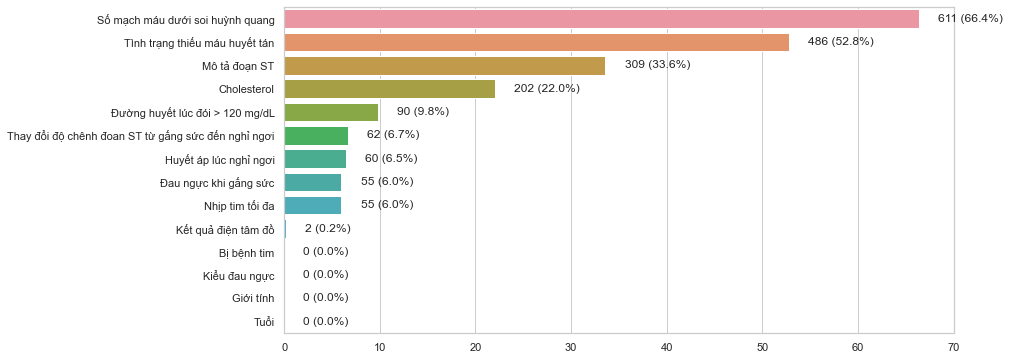

In [11]:
import matplotlib.pyplot as plt
import seaborn as sb
# Tính tỉ lệ dữ liệu thiếu của các biến
na_count= data.isna().sum(0).sort_values(ascending= False)
na_percent= (na_count/data.shape[0]) * 100
na_percent= na_percent.round(1)
# Thể hiện bằng biểu đồ
plt.figure(figsize= (12, 6))
sb.set(style="whitegrid")
sb.barplot(x=na_percent, y= [var_names[i] for i in na_count.index])
plt.xlim(0, 70)
for i in range(na_count.count()):
    plt.text(x= na_percent[i] + 2, y= i,
             horizontalalignment='left', verticalalignment='center',
             s= '{} ({}%)'.format(na_count[i], na_percent[i]))
plt.show()

### 3.2.  Biến số mục tiêu (biến số phụ thuộc) <a name= describe_target_variable></a>

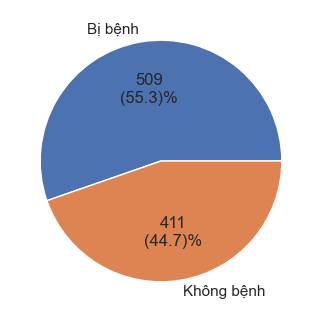

In [12]:
import matplotlib.pyplot as plt

# Function vẽ biểu đồ hình bánh
def pie_plot(data, col):
    count= data[col].value_counts()
    p, tx, autotexts= plt.pie(count, labels=count.index,
                              autopct= lambda p: u'{:.0f}\n({:.1f})%'.format(p * count.sum() / 100, p))
    
# Vẽ biểu đồ hình bánh
plt.figure(figsize=(4,4), dpi= 150)
pie_plot(data, 'target')
plt.show()

Số lượng bệnh nhân bị mắc bệnh tim chiếm tỉ lệ lớn hơn số người không bệnh tim. Tuy nhiên nhìn chung biến số mục tiêu trong tập dữ liệu này là cân bằng vì vậy không cần phép xử lý dữ liệu mất cân bằng.

### 3.3. Liên quan giữa các biên số phân loại với bệnh tim <a name= relationship_between_category_vs_target></a>

In [13]:
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, fisher_exact
def descibe_categorical(data, indep_var, dep_var= 'target', dropna= True):
    '''indep_var: biến số độc lập
       dep_var: biến số phụ thuộc'''
    print('-' * 15, 'Mối liên quan giữa', var_names[indep_var], 'và', var_names[dep_var],  '-' * 15)
    table_count= pd.crosstab(data[dep_var], data[indep_var], dropna= dropna)
    table_percent= pd.crosstab(data[dep_var], data[indep_var], normalize= 'columns', dropna= dropna) * 100
    indep_count= data[indep_var].value_counts(dropna= dropna)
    
    # Xác định mỗi liên quan giữa hai biến số phân loại sử dụng kiểm định Chi bình phương
    # Nếu kiểm định Chi bình phương được thay thế bằng kiểm định Fisher Exact khi:
    #    - Có ít nhất một giá trí có vọng trị <= 1
    #    - Có từ 20% giá trí có vọng trị <= 5
    test= 'Chi-square'
    chi2, p, dof, exp= chi2_contingency(table_count)
    print('Chỉ số Chi-squared:', chi2)
    print('Độ tự do:', dof)
    if (exp < 5).sum() / (exp.shape[0] * exp.shape[1]) > 0.2 or (exp < 1).any():
      odd_radio, p= fisher_exact(table_count)
      test= 'Fisher Exact'
    print('Giá trị p của kiểm định {}:'.format(test), p)

    # Trực quan mối quan hệ giữa indep_var và dep_var
    plt.figure(figsize= (10, 5))
    plt.barh(width= table_percent.iloc[0,:], y= table_percent.columns,
             label= table_percent.index[0], color= '#cc2900')
    plt.barh(width= table_percent.iloc[1,:], y= table_percent.columns, 
             label= table_percent.index[1], color= '#00b300',
             left= table_percent.iloc[0,:])
    for i in range(table_percent.shape[1]):
        x= table_percent.iloc[0, i] / 2
        text= '{}\n({}%)'.format(table_count.iloc[0, i], round(table_percent.iloc[0, i], 1))
        plt.text(x= x, y= i, s= text,
                horizontalalignment='center', verticalalignment='center')
    for i in range(table_percent.shape[1]):
        x= table_percent.iloc[0, i] + table_percent.iloc[1, i] / 2
        text= '{}\n({}%)'.format(table_count.iloc[1, i], round(table_percent.iloc[1, i], 1))
        plt.text(x= x, y= i, s= text,
                horizontalalignment='center', verticalalignment='center')
    plt.box(False)
    plt.xticks([])
    plt.legend(loc= 'upper center', bbox_to_anchor= (0.5, -0.05), ncol= 2)

    # Vẽ biểu đồ mô tả indep_var
    plt.subplots_adjust(bottom=0.07, right= 0.8, top= 0.9)
    plt.axes([0.80, 0.1, 0.075, 0.8])
    plt.axis("off")
    plt.tick_params(axis='x', labelbottom=False)
    bottom= 0
    for i in table_percent.columns:
        height= 100 * indep_count[i]/indep_count.sum()
        plt.bar(height= height,x= 0, bottom= bottom, width= 4)
        text= '{}\n({}%)'.format(indep_count[i] , round(height, 1))
        plt.text(x= 0, y= bottom + height/2, s= text,
                horizontalalignment='center', verticalalignment='center')
        bottom+= height
    plt.show()
        

--------------- Mối liên quan giữa Giới tính và Bị bệnh tim ---------------
Chỉ số Chi-squared: 85.3612388986764
Độ tự do: 1
Giá trị p của kiểm định Chi-square: 2.48545278620117e-20


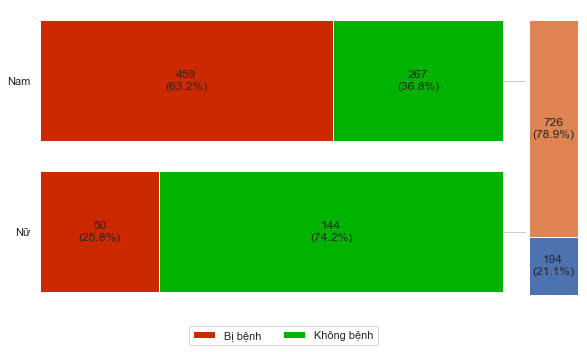

--------------- Mối liên quan giữa Kiểu đau ngực và Bị bệnh tim ---------------
Chỉ số Chi-squared: 268.3457473383063
Độ tự do: 3
Giá trị p của kiểm định Chi-square: 7.03652487781721e-58


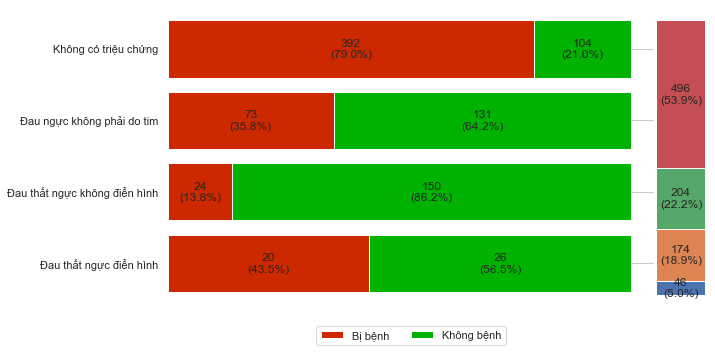

--------------- Mối liên quan giữa Đường huyết lúc đói > 120 mg/dL và Bị bệnh tim ---------------
Chỉ số Chi-squared: 16.111634768381286
Độ tự do: 1
Giá trị p của kiểm định Chi-square: 5.9716039956122106e-05


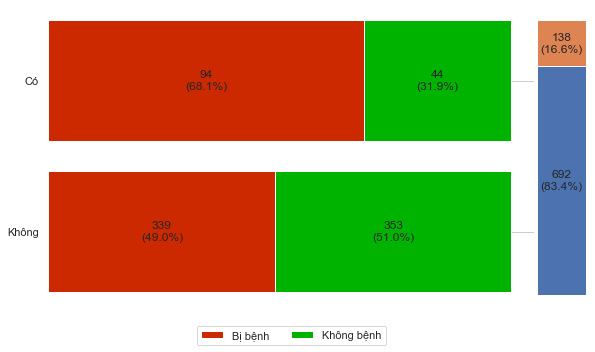

--------------- Mối liên quan giữa Kết quả điện tâm đồ và Bị bệnh tim ---------------
Chỉ số Chi-squared: 11.711881268428337
Độ tự do: 2
Giá trị p của kiểm định Chi-square: 0.0028628414475911114


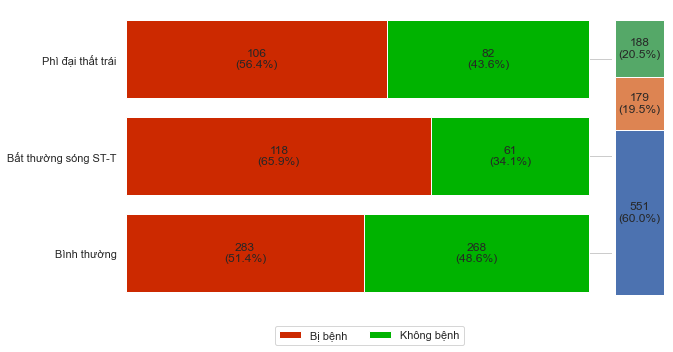

--------------- Mối liên quan giữa Đau ngực khi gắng sức và Bị bệnh tim ---------------
Chỉ số Chi-squared: 184.02013176183246
Độ tự do: 1
Giá trị p của kiểm định Chi-square: 6.422656534867949e-42


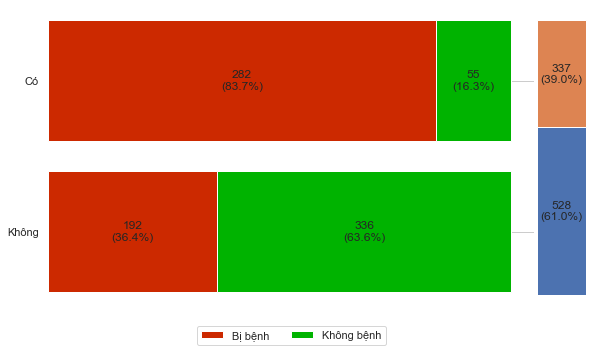

--------------- Mối liên quan giữa Mô tả đoạn ST và Bị bệnh tim ---------------
Chỉ số Chi-squared: 88.85174940345678
Độ tự do: 2
Giá trị p của kiểm định Chi-square: 5.082621430671035e-20


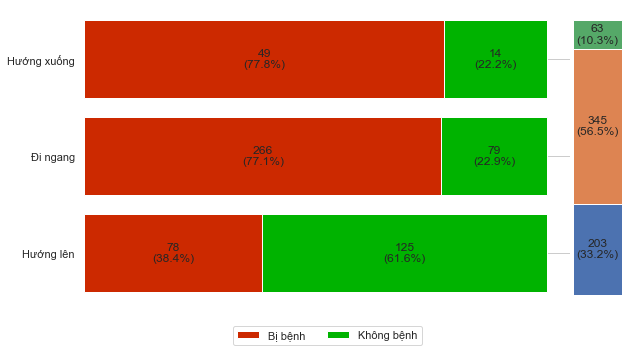

--------------- Mối liên quan giữa Tình trạng thiếu máu huyết tán và Bị bệnh tim ---------------
Chỉ số Chi-squared: 109.04739780567616
Độ tự do: 2
Giá trị p của kiểm định Chi-square: 2.092466113570906e-24


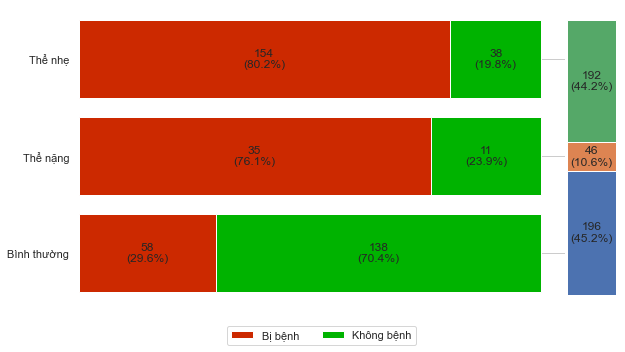

In [14]:
for indep_var in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']:
  descibe_categorical(data, indep_var, dep_var= 'target')

-__Giới tính:__Trong tập dữ liệu về bệnh nhân đến khám về bệnh tim thì có đến 78,9% bệnh nhân là nam giới. Trong nhóm nam giới tỉ lệ có kết luận mắc bệnh tim cũng chiếm tỉ lệ cao (63,2%), trong khi tỉ lệ được kết luận mắc bệnh tim chỉ chiếm 25,8%. Giữa giới tính và mắc bệnh tim có sự liên quan có ý nghĩa thống kê với giá trị p < 0.05 cho kiểm định Chi bình phương.  

-__Kiểu đau ngực:__ Có đến 53% bệnh nhân đến khám về bệnh tim đều không có triệu chứng đau ngực và trong nhóm bệnh nhân không có triệu chứng này có đến 79% được kết luận là mắc bệnh tim. Nhóm bệnh nhân có triệu chứng đau ngực không điển hình chỉ có 13,8% có kết luận mắc bệnh tim. Giữa kiểu đau ngực và mắc bệnh tim có mối liên quan có ý nghĩa thống kê với p < 0.05 cho kiểm định Chi bình phương. 

-__Đường huyết lúc đói < 120 mg/dL:__ 	Chỉ có 16,6% bệnh nhân đến khám vì bệnh tim có Đường huyết lúc đói > 120 mg/dL tuy nhiên tỉ lệ mắc bệnh tim trong nhóm này lên đến 68,1% trong khi nhóm Đường huyết lúc đói < 120 mg/dL chỉ chiếm 49%. Có mối liên quan có ý nghĩa thống kê giữa Đường huyết lúc đói > 120 mg/dL và mắc bệnh tim với p < 0.05 cho kiểm định Chi bình phương.

-__Kết quả điện tâm đồ:__ Đến 60% bệnh nhân đo điện tâm đồ có kết quả bình thường, chỉ 20,5% bệnh nhân bị phì đại thất trái và 19,5% có bất thường sóng ST-T. Trong nhóm có bất thường sóng ST-T có tỉ lệ bị bệnh tim cao nhất chiếm 65,9% và tỉ lệ phì đại thất trái bị bệnh tim là 56,4%. Có mối liên quan có ý nghĩa thống kê giữa kết quả đo điện tâm đồ và bị bệnh tim với p < 0,05 cho kiểm định Chi bình phương.

-__Đoạn sóng ST trong điện tâm đồ:__ Đa số bệnh nhân có mô tả đoạn sóng ST trong điện tâm đồ dạng đi ngang. Trong hai nhóm có sóng ST đi ngang và hướng xuống thì tỉ lệ bị bệnh tim lên đến 77% là mắc bệnh tim. Có mối liên quan có ý nghĩa thống kê giữa mô tả đoạn sóng ST trong điện tâm đồ và bị bệnh tim với p < 0,05 cho kiểm định Chi bình phương.

-__Đau ngực khi gắng sức:__ Tỉ lệ bệnh nhân bị đau ngực khi gắng sức là thấp hơn tỉ lệ bệnh nhân không bị đau ngực khi gắng sức tuy nhiên trong nhóm đau ngực khi gắng sức có tỉ lệ mắc bệnh tim cao lên đến 83,7%, gần gấp 3 lần so với tỉ lệ mắc bệnh tim trong nhóm không đau ngực khi gắng sức. Có mối liên quan có ý nghĩa thống kê giữa đau ngực khi gắng sức và bị bệnh tim với p < 0,05 cho kiểm định Chi bình phương.  

-__Tình trạng thiếu máu huyết tán:__ Có đến 44,2% bệnh nhân đến khám bị thiếu máu huyết tán thể nhẹ và chỉ 10,6% bị thiếu máu huyết tán thể nặng tuy nhiên tỉ lệ bị bệnh tim trong cả hai nhóm này đề ở mức cao so với nhóm không bị thiếu máu huyết tán. Có mối liên quan có ý nghĩa thống kê giữa tình trạng thiếu máu huyết tán và bị bệnh timvới p < 0,05 cho kiểm định Chi bình phương.

### 3.4.  Liên quan giữa các biên số định lượng với bệnh tim <a name= relationship_between_numberic_vs_target></a>

In [15]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu
import seaborn as sb
def descibe_numerical (data, indep_var, dep_var= 'target'):
    '''indep_var: biến số độc lập
       dep_var: biến số phụ thuộc'''
    print('-' * 15, 'Mối liên quan giữa', var_names[indep_var], 'và', var_names[dep_var],  '-' * 15)
    gr0_condition= data[dep_var] == data[dep_var].unique()[0]
    gr1_condition= data[dep_var] == data[dep_var].unique()[1]
    not_na= ~ data[indep_var].isna()
    gr0_value= data[indep_var][not_na & gr0_condition]
    gr1_value= data[indep_var][not_na & gr1_condition]   
    
    # Kiểm tra điều kiện phân phối chuẩn của biến số phụ thuộc bằng kiểm định Shapiro
    # Giả thuyết H0 của kiển định Shapipo là biến số có phân phối bình thường
    shapiro_statistic, shapiro_p = shapiro(data[indep_var].loc[not_na])
    normal= shapiro_p > 0.05
    print('Kiểm định phân phối chuẩn cho biến số', indep_var, 'với p=', shapiro_p)
    # Kiểm định phương sai tương đồng ở hai nhóm bằng kiểm định Levene
    # Giả thuyết H0 của kiến định Levene là phương sai các nhóm không có sự khác biệt

    levene_statistic, levene_p= levene(gr0_value, gr1_value, center= 'mean')
    equal_variances= levene_p > 0.05
    print('Kiểm định phương sai giữa các nhóm trong biến', indep_var, 'với p=', levene_p)
    # Kiểm định T sẽ được thay thế bằng kiểm định phi tham số Mann-Whitney trong các trường hợp sau:
    # - Biến số định lượng có phân phối không bình thường (shapiro_p < 0.05)
    # - Phương sai các nhóm không đồng nhất (levene_p < 0.05)

    t_statistic, t_p= ttest_ind(gr0_value, gr1_value)
    print('Kiểm định T với p=', t_p)

    mannwhitneyu_statistic, mannwhitneyu_p= mannwhitneyu(gr0_value, gr1_value)
    print('Kiểm định Mann-Whitney với p=', mannwhitneyu_p)

    print('* Nhóm', data[dep_var].unique()[0], ':')
    print('\t- Trung bình:', gr0_value.mean())
    print('\t- Trung vị:', gr0_value.median())
    print('\t- Độ lệch chuẩn:', gr0_value.std())
    print('* Nhóm', data[dep_var].unique()[1], ':')
    print('\t- Trung bình:', gr1_value.mean())
    print('\t- Trung vị:', gr1_value.median())
    print('\t- Độ lệch chuẩn:', gr1_value.std())

    # Trực quan mối quan hệ giữa indep_var và dep_var
    plt.figure(figsize= (15, 5))
    plt.subplot(121)
    sb.distplot(data[indep_var], hist=False, color="#f7f323",
                kde_kws={"shade": True},
                label= 'Toàn bộ')
    sb.distplot(gr0_value, hist=False, color="#00b300",
                kde_kws={"shade": True},
                label= data[dep_var].unique()[0])
    sb.distplot(gr1_value, hist=False, color="#cc2900",
                kde_kws={"shade": True},
                label= data[dep_var].unique()[1])
    plt.subplot(122)
    sb.boxplot(x=data[dep_var], y=data[indep_var], palette= 'Blues_d')
    plt.show()

--------------- Mối liên quan giữa Tuổi và Bị bệnh tim ---------------
Kiểm định phân phối chuẩn cho biến số age với p= 2.273557947773952e-05
Kiểm định phương sai giữa các nhóm trong biến age với p= 0.02013318775164833
Kiểm định T với p= 2.2906138697114922e-18
Kiểm định Mann-Whitney với p= 6.44436638310142e-19
* Nhóm Không bệnh :
	- Trung bình: 50.54744525547445
	- Trung vị: 51.0
	- Độ lệch chuẩn: 9.433699946302818
* Nhóm Bị bệnh :
	- Trung bình: 55.90373280943025
	- Trung vị: 57.0
	- Độ lệch chuẩn: 8.718958764910905


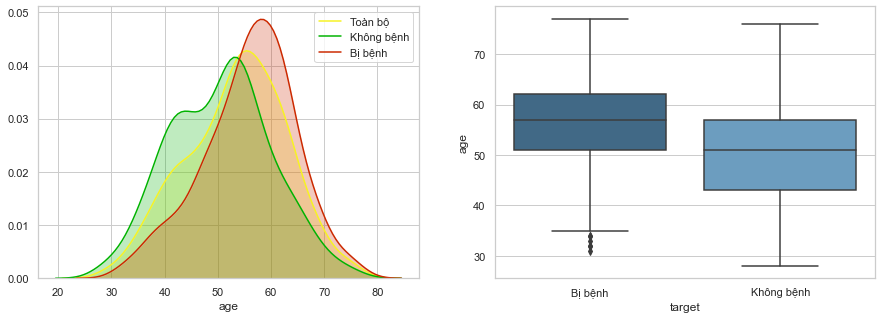

--------------- Mối liên quan giữa Huyết áp lúc nghỉ ngơi và Bị bệnh tim ---------------
Kiểm định phân phối chuẩn cho biến số trestbps với p= 1.4051430375153218e-12
Kiểm định phương sai giữa các nhóm trong biến trestbps với p= 0.00039411178241884764
Kiểm định T với p= 0.0005888105614081387
Kiểm định Mann-Whitney với p= 0.0006498117475626802
* Nhóm Không bệnh :
	- Trung bình: 129.91304347826087
	- Trung vị: 130.0
	- Độ lệch chuẩn: 16.869867194943406
* Nhóm Bị bệnh :
	- Trung bình: 134.26439232409382
	- Trung vị: 130.0
	- Độ lệch chuẩn: 19.61788906239803


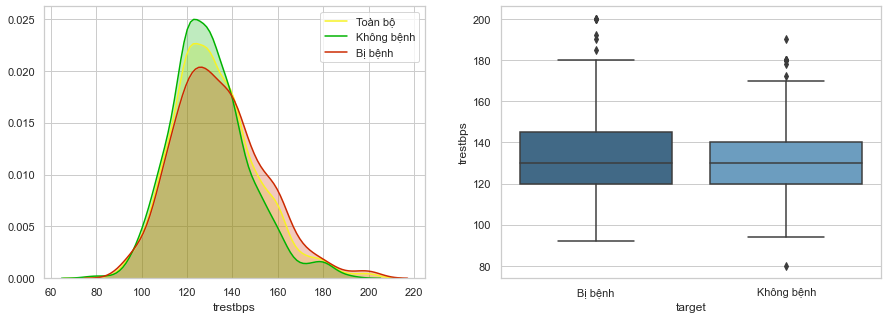

--------------- Mối liên quan giữa Cholesterol và Bị bệnh tim ---------------
Kiểm định phân phối chuẩn cho biến số chol với p= 7.789230610528066e-18
Kiểm định phương sai giữa các nhóm trong biến chol với p= 0.34978790889536227
Kiểm định T với p= 0.0014918331013067262
Kiểm định Mann-Whitney với p= 0.00034851259332447987
* Nhóm Không bệnh :
	- Trung bình: 240.15860215053763
	- Trung vị: 233.0
	- Độ lệch chuẩn: 55.76755866682709
* Nhóm Bị bệnh :
	- Trung bình: 254.00867052023122
	- Trung vị: 248.0
	- Độ lệch chuẩn: 60.620438845026456


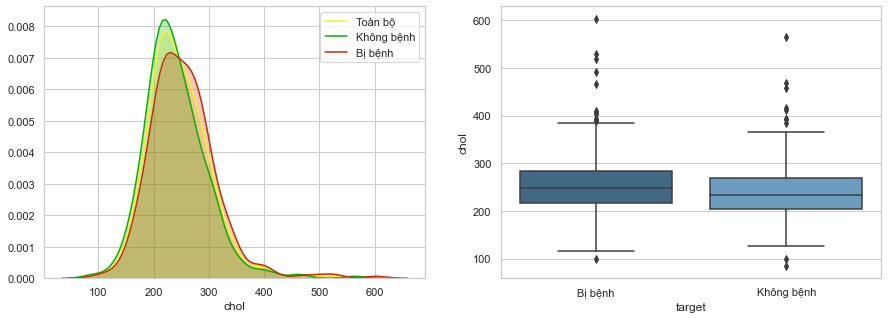

--------------- Mối liên quan giữa Nhịp tim tối đa và Bị bệnh tim ---------------
Kiểm định phân phối chuẩn cho biến số thalach với p= 1.9056464225286618e-05
Kiểm định phương sai giữa các nhóm trong biến thalach với p= 0.7182944597321983
Kiểm định T với p= 1.3597938669468356e-33
Kiểm định Mann-Whitney với p= 4.5129798120402917e-32
* Nhóm Không bệnh :
	- Trung bình: 148.80051150895142
	- Trung vị: 151.0
	- Độ lệch chuẩn: 23.60869243969362
* Nhóm Bị bệnh :
	- Trung bình: 128.26160337552741
	- Trung vị: 128.0
	- Độ lệch chuẩn: 24.02419328433036


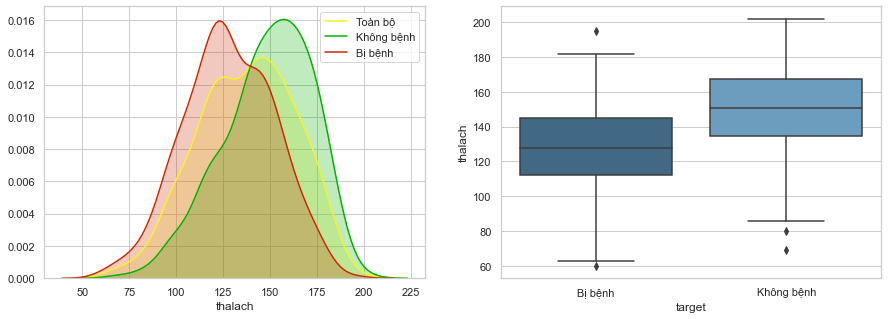

--------------- Mối liên quan giữa Thay đổi độ chênh đoan ST từ gắng sức đến nghỉ ngơi và Bị bệnh tim ---------------
Kiểm định phân phối chuẩn cho biến số oldpeak với p= 8.809237269401244e-28
Kiểm định phương sai giữa các nhóm trong biến oldpeak với p= 2.061636576446491e-23
Kiểm định T với p= 8.649375781608786e-32
Kiểm định Mann-Whitney với p= 4.2563345443601186e-32
* Nhóm Không bệnh :
	- Trung bình: 0.4182051282051282
	- Trung vị: 0.0
	- Độ lệch chuẩn: 0.7156364912679497
* Nhóm Bị bệnh :
	- Trung bình: 1.2626068376068378
	- Trung vị: 1.05
	- Độ lệch chuẩn: 1.1974237331447581


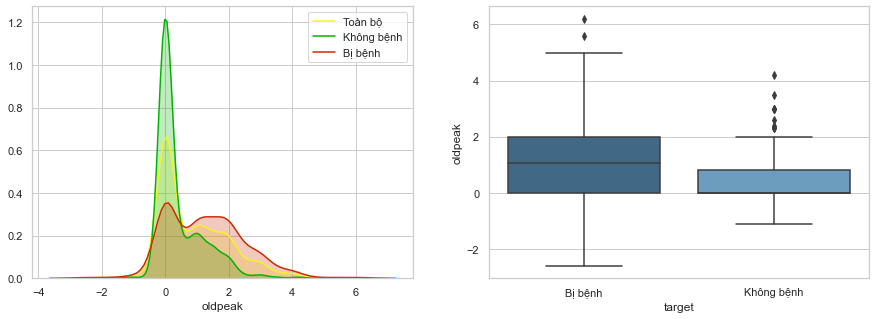

--------------- Mối liên quan giữa Số mạch máu dưới soi huỳnh quang và Bị bệnh tim ---------------
Kiểm định phân phối chuẩn cho biến số ca với p= 2.3142074002661536e-22
Kiểm định phương sai giữa các nhóm trong biến ca với p= 8.172554869879383e-11
Kiểm định T với p= 3.05284114515912e-17
Kiểm định Mann-Whitney với p= 9.33980105677936e-18
* Nhóm Không bệnh :
	- Trung bình: 0.2787878787878788
	- Trung vị: 0.0
	- Độ lệch chuẩn: 0.6400064670774512
* Nhóm Bị bệnh :
	- Trung bình: 1.1319444444444444
	- Trung vị: 1.0
	- Độ lệch chuẩn: 1.0121397936683263


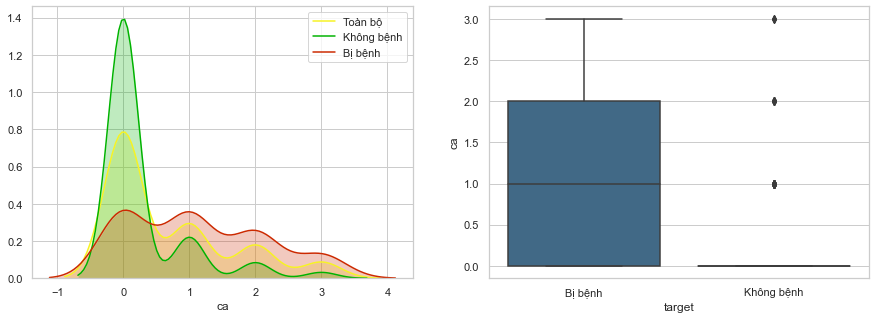

In [16]:
numerical= ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
for col in numerical:
  descibe_numerical (data, indep_var= col, dep_var= 'target')

-__Tuổi:__
  - Biến số tuổi không có kiểu phân phối chuẩn với kiểm định Shapipo có p < 0,05. 
  - Độ tuổi trung bình và trung vị của nhóm không bị bệnh tim lần lượt là 50,5 và 51 thấp hơn trong nhóm bị bệnh tim với lần lượt là 55,9 và 57. Khác biệt này có ý nghĩa thống kê giữa độ tuổi và bệnh tim theo kiểm định Mann-Whitney có p < 0,05.

-__Huyết áp lúc nghỉ ngơi:__
  - Biến số huyết áp lúc nghỉ ngơi không có kiểu phân phối chuẩn với kiểm định Shapipo có p < 0,05.
  - Huyết áp trung bình của nhóm bị bệnh tim là 134 mmHg cao hơn huyết áp trung bình của nhóm không bị bệnh tim với trung bình là 129 mmHg. Khác biệt này có ý nghĩa thống kê theo kiểm định Mann-Whitney với p < 0,05.  

-__Chỉ số Cholesterol:__
  - Biến số Cholesterol không có kiểu phân phối chuẩn với kiểm định Shapipo có p < 0,05.
  - Chỉ số Cholesterol trung bình của nhóm bị bệnh tim là 254 mg/dL cao hơn Cholesterol trung bình của nhóm không bị bệnh tim với trung bình là 240 mg/dL. Khác biệt này có ý nghĩa thống kê theo kiểm định Mann-Whitney với p < 0,05.

-__Nhịp tim tối đa:__
  - Biến số Nhịp tim tối đa không có kiểu phân phối chuẩn với kiểm định Shapipo có p < 0,05.
  - Nhịp tim tối đa trung bình của nhóm bị bệnh tim là 128 lần/s thấp hơn nhịp tim tối đa trung bình của nhóm không bị bệnh tim với trung bình là 151 lần/s. Khác biệt này có ý nghĩa thống kê với p < 0,05.

-__Thay đổi độ chênh đoạn ST:__
  - Biến số thay đổi độ chênh đoạn ST không có kiểu phân phối chuẩn với kiểm định Shapipo có p < 0,05. 
  - Thay đổi độ chênh đoạn ST trung bình của nhóm bị bệnh tim là 1,26 cao hơn thay đổi độ chênh đoạn ST trung bình của nhóm không bị bệnh tim với trung bình là 0,41 lần/s. Khác biệt này ý nghĩa thống kê theo kiểm định Mann-Whitney với p < 0,05.

-__Số mạch máu dưới phép soi huỳnh quang:__
  - Số mạch máu dưới phép soi huỳnh quang là một biến số không liên tục. 
  - Trung vị số mạch máu dưới phép soi huỳnh quang của nhóm bị bệnh là 1 trong khi trung vị của nhóm không bị bệnh là 0. Sự khác biệt này có ý nghĩa thống kê với kiểm định Mann-Whitney có p < 0,05.


### 3.5. Tương quan giữa các biến số độc lập <a name= correlation_between_variables></a>

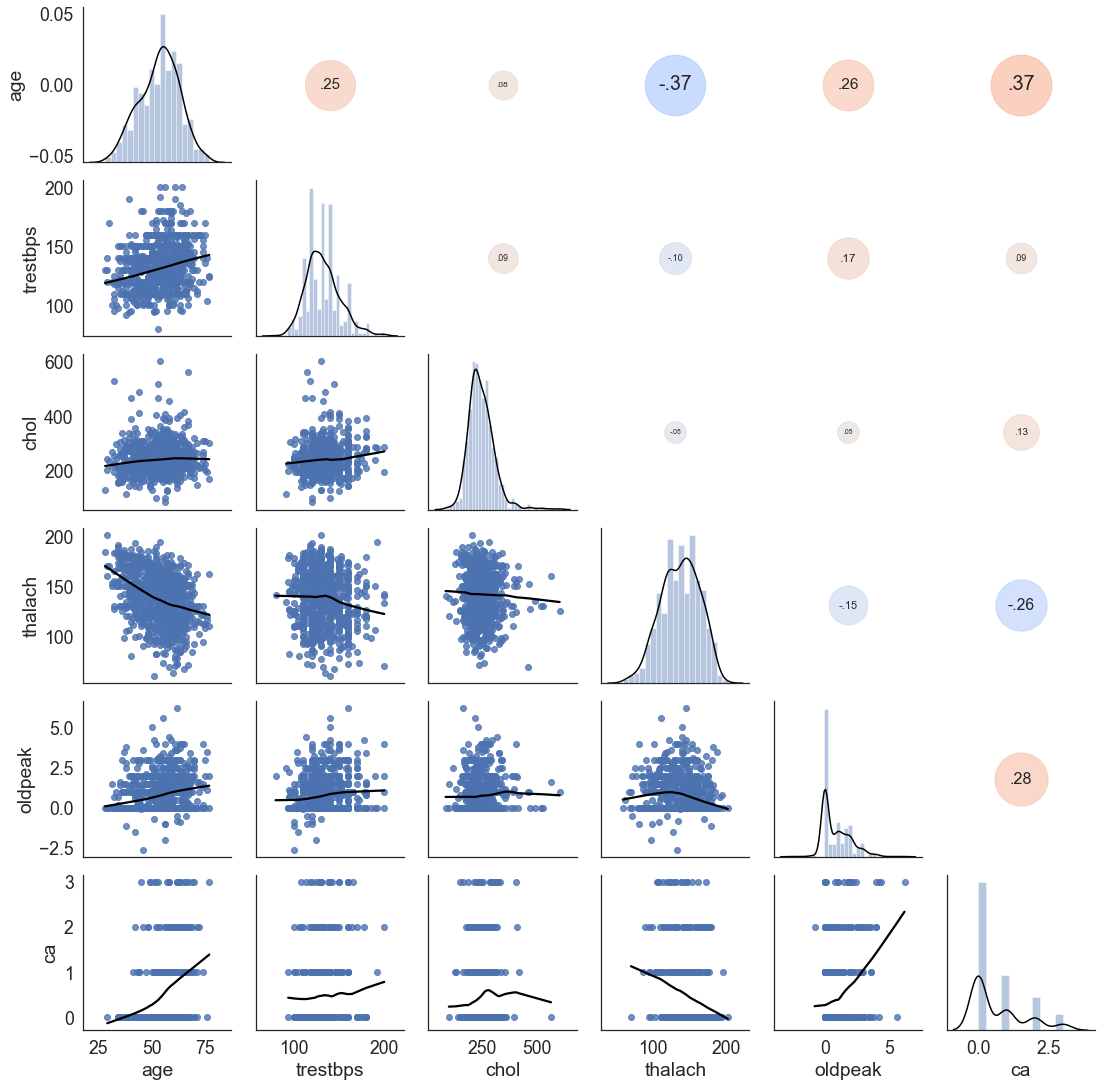

In [18]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sb.set(style='white', font_scale=1.6)
g = sb.PairGrid(data, diag_sharey=False)
g.map_lower(sb.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sb.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)


Các biến số định lượng dùng để dự đoán nguy cơ mắc bệnh tim đều không có tương quan hoặc tương quan thấp với nhau.

## 4. Tiền xử lý dữ liệu <a name= preprocessing></a>

### 4.1 Lựa chọn biến số đưa vào mô hình <a name= feature_selection></a>

Một số biến số có tỉ lệ giá trị trống cao. Từ đó quyết định lựa chọn loại bỏ một số biến sô ra khỏi mô hình vì lý do tỉ lệ dữ liệu trống quá cao:
- Chỉ số Cholesterol (mg/dL). 
- Đoạn ST (trong điện tâm đồ). 
- Số mạch máu phát hiện được dưới phép soi huỳnh quang (flourosopy). 

Tuy biến số Tình trạng bệnh thiếu máu huyết tán (thalassemia) có tỉ lệ dữ liệu thiếu cao nhưng có thể vì lý do bệnh nhân không có các triệu chứng của thiếu máu vì vậy không làm xét nghiệm cho bệnh này. Nhóm không thực hiện xét nghiệm có thể đại diện được cho môt nhóm có đặc điểm riêng.

In [19]:
# Lựa chọn biế số vào mô hình
X = data[['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'thal']]
y= data['target']

### 4.2 Làm sạch dữ liệu <a name=data_cleaning></a>

Các bệnh nhân trong các tập dữ liệu cung cấp không được định danh bằng ID tuy nhiên kiểm tra tính trùng lặp thì không có trường hợp nào trùng nhau vì vậy chấp nhận mỗi bản ghi là một đối tượng độc lập.  

Phát hiện thấy tại hai biến số chỉ số huyết áp lúc nghỉ ngơi (trestbps) và chỉ số Cholesterol (chol) xuất hiện các giá trị bằng 0. Điều này không phù hợp với thực tế bởi vì những chỉ số này không thể tồn tại giá trị 0. Xem như những giá trị sai khác này giống như dữ liệu bị thiếu và được xử lý như ở dưới.  

Khảo sát trực quan bằng biểu đồ hình hộp cho thấy có xuất hiện các giá trị ngoại lai ở các biến số định lượng như: huyết áp lúc nghỉ ngơi, chỉ số Cholesterol, nhịp tim tối đa, thay đổi độ chênh đoạn ST. Tuy nhiên, trong y khoa các chỉ số xét nghiệm nằm ngoài giá trị bình thường này thường mang ý nghĩa chỉ thị của một sự bất thường trong sức khỏe vì vậy mà tôi sẽ không thực hiện các biện pháp loại bỏ giá trị ngoại lai đối với tập dữ liệu này.

Có 7 biến số được lựa chọn đưa vào mô hình nhưng chứa các giá trị trống sẽ có phương án xử lý như sau:
- Chỉ số huyết áp lúc nghỉ ngơi (mm Hg):	phụ thuộc vào biến số giới tính để thay thế bằng giá trị trung bình trong nhóm giới tính tương ứng.  
- Đường huyết lúc đói lớn hơn 120 mg/dL:	thay thế bằng nhóm có tần suất xuất hiện cao nhất.  
- Kết quả điện tâm đồ lúc nghỉ ngơi:	thay thế bằng nhóm có tần suất xuất hiện cao nhất.  
- Nhịp tim tối đa:	phụ thuộc vào biến số giới tính để thay thế bằng giá trị trung bình trong nhóm giới tính tương ứng.  
- Đau ngực khi gắng sức:	thay thế bằng nhóm không bị đau ngực khi gắng sức. Bởi vì có thể bệnh nhân thực sự không có triệu chứng đau ngực khi gắng sức do đó người thu thập không ghi nhận tình trạng này.
- Thay đổi độ chênh đoạn ST từ gắng sức đến nghỉ ngơi:	thay thế bằng giá trị trung vị của biến số bởi vì biến số này không có phân phối bình thường.
- Tình trạng bệnh thiếu máu huyết tán (thalassemia):	nhóm dữ liệu trống được chuyển thành một nhóm riêng vì có thể nhóm bệnh nhân này không có các biểu hiện triệu chúng của thiếu máu vì vậy bác sĩ không chỉ định thực hiện xét nghiệm này.



In [20]:
# Chia tập dữ liệu thành tập huấn luyện và tập kiểm định
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
trestbps_nam= X_train['trestbps'][X_train.sex == 'Nam'].mean()
print('Giá trị trung bình của nam trong biến trestbps:', trestbps_nam)
trestbps_nu= X_train['trestbps'][X_train.sex == 'Nữ'].mean()
print('Giá trị trung bình của nữ trong biến trestbps:', trestbps_nu)

Giá trị trung bình của nam trong biến trestbps: 132.24169741697418
Giá trị trung bình của nữ trong biến trestbps: 130.45945945945945


In [22]:
# Câu lệnh truyền vào FunctionTransformer để xử lý dữ liệu thiếu biến trestbps
def _trestbps_fillna(x):
  y= x.copy()
  is_na= x['trestbps'].isna()
  is_nam= x['sex']== 'Nam'
  is_nu= x['sex']== 'Nữ'
  y.loc[is_na & is_nam, 'trestbps'] = 132.2
  y.loc[is_na & is_nu, 'trestbps'] = 130.6
  return y[['trestbps']]

In [23]:
thalach_nam= X_train['thalach'][X_train.sex == 'Nam'].mean()
print('Giá trị trung bình của nam trong biến thalach:', thalach_nam)
thalach_nu= X_train['thalach'][X_train.sex == 'Nữ'].mean()
print('Giá trị trung bình của nữ trong biến thalach:', thalach_nu)

Giá trị trung bình của nam trong biến thalach: 134.71794871794873
Giá trị trung bình của nữ trong biến thalach: 147.21621621621622


In [24]:
# Câu lệnh truyền vào FunctionTransformer để xử lý dữ liệu thiếu biến thalach
def _thalach_fillna(x):
  y= x.copy()
  is_na= x['thalach'].isna()
  is_nam= x['sex']== 'Nam'
  is_nu= x['sex']== 'Nữ'
  y.loc[is_na & is_nam, 'thalach'] = 134.7
  y.loc[is_na & is_nu, 'thalach'] = 147.2
  return y[['thalach']]

In [25]:
# Tạo đối tương để đưa vào Pipeline tiền xử lý dữ liệu
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# Biến age không xử lý
# Mã hóa biến sex
binary_endcode= OneHotEncoder(drop= 'first')
# Mã hóa biến cp
category_endcode= OneHotEncoder()
# Xử lý missing value biến trestbps
trestbps_fillna= FunctionTransformer(func= _trestbps_fillna)
# Xử lý giá trị trống và mã hóa biến fbs
fill_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
binary_endcode_fillna = Pipeline(steps=[
                                        ('fill_na', fill_most_frequent),
                                        ('binary_endcode', binary_endcode)
                                        ])
# Xử lý giá trị trống và mã hóa biến restecg
restecg_endcode = Pipeline(steps=[
                                 ('fill_na', fill_most_frequent),
                                 ('category_endcode', category_endcode)
                                ])
# Xử lý missing value biến thalach
thalach_fillna= FunctionTransformer(func= _thalach_fillna)
# Xử lý missing value biến exang
exang_fillna = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 'Không')
exang_endcode = Pipeline(steps=[
                                 ('fill_na', exang_fillna),
                                 ('binary_endcode', binary_endcode)
                                ])
# Xử lý missing value biến oldpeak
fill_median = SimpleImputer(missing_values=np.nan, strategy='median')
# Xử lý missing value và mã hóa biến thal
thal_fillna = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 'Khác')
thal_endcode = Pipeline(steps=[
                              ('fill_na', thal_fillna),
                              ('category_endcode', category_endcode)
                              ])

# Tạo đối tượng để xử lý dữ liệu
preprocessor= ColumnTransformer(transformers= [('age', 'passthrough', ['age']),
                                               ('sex', binary_endcode, ['sex']),
                                               ('cp', category_endcode, ['cp']),
                                               ('trestbps', trestbps_fillna, ['trestbps', 'sex']),
                                               ('fbs', binary_endcode_fillna, ['fbs']),
                                               ('restecg', restecg_endcode, ['restecg']),
                                               ('thalach', thalach_fillna, ['thalach', 'sex']),
                                               ('exang', exang_endcode, ['exang']),
                                               ('oldpeak', fill_median, ['oldpeak']),
                                               ('thal', thal_endcode, ['thal'])],
                              remainder= 'passthrough')


### 4.3 Chuẩn hóa dữ liệu <a name=data_normalization></a>

Với một số mô hình dựa trên cơ sở tính toán bằng đại số tuyến tính sẽ được bổ sung thêm phép co dãn dữ liệu min-max. Lý do của việc lựa chọn phép co dãn này là vì vừa đảm bảo chuẩn hóa các biến số về có chung một thang đo vừa đảm bào không làm mất đi ý nghĩa của những giá trị ngoại lai như trình bày ở trên.

In [26]:
from sklearn.preprocessing import StandardScaler
# Tạo đối tượng để chuẩn hóa dữ liệu
scaler= StandardScaler()

## 5. Xây dựng mô hình <a name=model_building></a>

### 5.1 Các thuật toán được lựa chọn <a name=ml_algorithm></a>



Biến số mục tiêu là tình trạng bị bệnh hay không bị bệnh do đó mô hình được xây dựng là mô hình phân loại. Bốn thuật toán học máy được lựa chọn để đưa vào xây dựng mô hình là những thuật toán mạnh trong phân loại nhị phân. Các thuật toán được chọn như sau:
- Thuật toán Random Forest Classifier
- Thuật toán Gaussian Naive Bayes
- Thuật toán K-nearest Neighbors Classifier
- Thuật toán C-Support Vector Classification

In [27]:
# Tạo đối tượng để xây dựng mô hình cho từng thuật toán
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

rfc= RandomForestClassifier()
nbc= GaussianNB()
knnc= KNeighborsClassifier()
svc= SVC()


### 5.2 Tiêu chuẩn đánh giá mô hình và phương pháp xây dựng mô hình <a name=evaluation_criteria_and_method></a>

__Tiêu chuẩn đánh giá mô hình:__  
Trong bài toán phân loại hiện tại có rất nhiều tiêu chuẩn phổ biến để đánh giá mô hình như:
- i. Độ chính xác tổng quát (Accuracy)
- ii. Tỉ lệ phân loại dương tính đúng (True Positive rate (TPR)) / Độ nhạy (Sensitivity) / Recall
- iii. Độ đặc hiệu (Specificity) / Tỉ lệ loại trừ đúng (True negative rate (TNR))
- iv. Độ chính xác (Precision) / Giá trị tiên đoán dương (Positive predictive value (PPV))
- v. Giá trị tiên đoán âm (Negative predictive value (NPV))
- vi. F1 score
- vii. Diện tích dưới đường cong Receiver Operating Characteristics (AUC)
- .....

Tôi lựa chọn chỉ số diện tích dướng đường cong ROG (viết tắt là AUC) để làm tiêu chuẩn đánh giá và lựa chọn mô hình vì tiêu chuẩn này đánh giá phổ quát mô hình ở các điểm ngưỡng khác nhau trong khi các chỉ số khác lại bị thay đổi vào mỗi điểm ngưỡng khác nhau.

__Phương pháp xây dựng mô hình:__  
Tập dữ liệu gốc được chia thành tập dữ liệu huấn luyện và tập dữ liệu kiểm định (phương pháp kiểm định chéo Hold-out) với tỉ lệ 80:20.  
Mỗi thuật toán đều sẽ được áp dụng lần lượt với các bộ tham số khác nhau, mỗi bộ tham số được khớp 5 lần, mỗi lần khớp với lượng mẫu ngẫu nhiên bằng 4/5 số lượng mẫu trong tập huấn luyện và đánh giá trên 1/5 mẫu còn lại của tập huấn luyện bằng chỉ số AUC. Bộ tham số nào có chỉ số AUC trung bình của 5 lần khớp mẫu cao nhất được lựa chọn để áp dụng cho thuật toán.   
Sau khi mỗi thuật toán đã có được bộ tham số phù hợp nhất thì sẽ tiếp tục được khớp với toàn tập mẫu huấn luyện, đánh giá chỉ số AUC bằng tập mẫu kiểm định. Thuật toán nào có chỉ số AUC cao nhất sẽ được lựa chọn là thuật toán chính thức.

In [28]:
# Bộ tham số của mỗi mô hình để chọn được bộ tốt nhất
rfc_param_grid = { 
                  'n_estimators': [35, 40, 45, 50],
                  'max_features': ['auto', 'sqrt', 'log2'],
                  'max_depth' : [8, 9, 10],
                  'criterion' :['gini', 'entropy']
                  }
nbc_param_grid= {}
knnc_param_grid = { 
                  'n_neighbors': [5, 6, 7],
                  'weights': ['uniform', 'distance'],
                  'metric' : ['euclidean', 'manhattan']
                  }
svc_param_grid = {
                  'C':[1,10,100,200],
                  'gamma':[0.01, 0.1, 1],
                  'kernel':['linear','rbf'],
                  'probability': [True]
                  }
classifier_lst= {
                 'RandomForestClassifier': {'clf': rfc, 'param_grid': rfc_param_grid} ,
                 'GaussianNB': {'clf': nbc, 'param_grid': nbc_param_grid},
                 'KNeighborsClassifier': {'clf': knnc, 'param_grid': knnc_param_grid},
                 'SVC': {'clf': svc, 'param_grid': svc_param_grid}
                 }

In [29]:
# Danh mục thực thi các thuật toán
algorithm_lst= {
                 'RandomForestClassifier': {'clf': rfc,
                                            'param_grid': rfc_param_grid,
                                            'scale': False,
                                            'color': '#ff0000'},
                 'GaussianNB':             {'clf': nbc,
                                            'param_grid': nbc_param_grid,
                                            'scale': False,
                                            'color': '#00ff40'},
                 'KNeighborsClassifier':   {'clf': knnc,
                                            'param_grid': knnc_param_grid,
                                            'scale': True,
                                            'color': '#0000ff'},
                 'SVC':                    {'clf': svc,
                                            'param_grid': svc_param_grid,
                                            'scale': True,
                                            'color': '#ffff00'}
                 }

In [30]:
# Tìm thuật toán theo AUC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
import time
# Vẽ biểu đồ biểu thị đường cong ROC
fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(9, 7))
lw= 1
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax.axis(xmin= 0, xmax=1, ymin= 0,ymax= 1.05)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic Curve')

summary_table= [] # Bảng lưu trữ kết quả xây dựng mô hình
# Xây dựng và đánh giá lần lượt cho từng thuật toán
for algorithm in algorithm_lst:
  summary= {}
  print('-' * 10,'Huấn luyện thuật toán', algorithm, '-' * 10)
  # Pipe line dành cho các thuật toán cần scale dữ liệu
  classifier_with_scaler= Pipeline(steps=[
                                          ('preprocess', preprocessor),
                                          ('scale', scaler),
                                          ('clf', algorithm_lst[algorithm]['clf'])
                                          ])
  # Pipe line dành cho các thuật toán không cần scale dữ liệu
  classifier_without_scaler= Pipeline(steps=[
                                            ('preprocess', preprocessor),
                                            ('clf', algorithm_lst[algorithm]['clf'])
                                            ])
  param_grid= algorithm_lst[algorithm]['param_grid']
  if algorithm_lst[algorithm]['scale']:
    classifier= classifier_with_scaler
  else:
    classifier= classifier_without_scaler
  # Dùng GridSearchCV để tìm bộ tham số tốt nhất cho các thuật toán bằng chỉ số AUC
  grid_search_cv = GridSearchCV(classifier,
                                param_grid= dict(('clf__' + key, value) for (key, value) in param_grid.items()),
                                scoring= 'roc_auc', cv=5, n_jobs= -1)
  grid_search_cv.fit(X_train, y_train)

  # Dự đoán bằng mô hình tốt nhất với tập kiểm định  
  t1= time.time() * 1000
  y_test_predict_proba= grid_search_cv.predict_proba(X_test)
  t2= time.time() * 1000
  t= t2 - t1

  # Vẽ đường cong ROC và tính toán chỉ số AUC
  # Tính các chỉ số cho đường cong ROC
  pos_label= 'Bị bệnh'
  pos_index= np.where(grid_search_cv.classes_ == pos_label)[0][0]
  fp_rate, tp_rate, thresholds = roc_curve(y_test, y_test_predict_proba[:, pos_index], pos_label= pos_label)
  # Tính chỉ số AUC trên tập kiểm định
  auc_test= auc(fp_rate, tp_rate)
  # Vẽ đường cong ROC
  ax.plot(fp_rate, tp_rate, lw=lw, color= algorithm_lst[algorithm]['color'],
           label='{} (area = {:.2f}, time= {:.2f})'.format(algorithm, auc_test, t))

  # In kết quả ra màn hình
  print('Bộ tham số tốt nhất tìm thấy:\n',grid_search_cv.best_params_)
  print('Chỉ số AUC trung bình của mô hình dưới phép kiểm định chéo 5CV trong tập huấn luyện:', grid_search_cv.best_score_)
  print('Chỉ số AUC của mô hình với tập kiểm định:', auc_test)
  print('Thời gian thực thu dự đoán cho tập kiểm định:', t, 'ms')
  print()
  print('-'*20,'//','-'*20)
  print()

  # Lưu trữ kêt quả sau khi huấn luyện của các thuật toán
  summary['algorithm'] = algorithm
  summary['parameters'] = grid_search_cv.best_params_
  summary['mean_auc_5cv'] = grid_search_cv.best_score_
  summary['auc_test'] = auc_test
  summary['time_ms'] = t

  summary_table.append(summary)

ax.legend(loc="lower right", fontsize= 'xx-small')
plt.close(fig)

---------- Huấn luyện thuật toán RandomForestClassifier ----------
Bộ tham số tốt nhất tìm thấy:
 {'clf__criterion': 'entropy', 'clf__max_depth': 8, 'clf__max_features': 'auto', 'clf__n_estimators': 40}
Chỉ số AUC trung bình của mô hình dưới phép kiểm định chéo 5CV trong tập huấn luyện: 0.8759547848990342
Chỉ số AUC của mô hình với tập kiểm định: 0.8976146788990825
Thời gian thực thu dự đoán cho tập kiểm định: 29.2470703125 ms

-------------------- // --------------------

---------- Huấn luyện thuật toán GaussianNB ----------
Bộ tham số tốt nhất tìm thấy:
 {}
Chỉ số AUC trung bình của mô hình dưới phép kiểm định chéo 5CV trong tập huấn luyện: 0.868690188762072
Chỉ số AUC của mô hình với tập kiểm định: 0.8775535168195719
Thời gian thực thu dự đoán cho tập kiểm định: 25.28466796875 ms

-------------------- // --------------------

---------- Huấn luyện thuật toán KNeighborsClassifier ----------
Bộ tham số tốt nhất tìm thấy:
 {'clf__metric': 'euclidean', 'clf__n_neighbors': 6, 'clf__weig

## 6. Đánh giá mô hình <a name=model_evaluation></a>

### 6.1 Lựa chọn thuật toán <a name=choose_algorithm></a>

In [31]:
# In bảng kết quả
summary_table= pd.DataFrame(summary_table)
summary_table[['algorithm', 'mean_auc_5cv', 'auc_test', 'time_ms']].style.format({"mean_auc_5cv": "{:20,.3f}", 
                                                                                  "auc_test": "{:20,.3f}", 
                                                                                  "time_ms": "{:20,.2f}"})\
                                                                          .hide_index()\
                                                                          .highlight_max(subset=['mean_auc_5cv', 'auc_test'], axis=0)\
                                                                          .highlight_min(subset=['time_ms'], axis=0)


algorithm,mean_auc_5cv,auc_test,time_ms
RandomForestClassifier,0.876,0.898,29.25
GaussianNB,0.869,0.878,25.28
KNeighborsClassifier,0.854,0.869,31.03
SVC,0.875,0.896,21.25


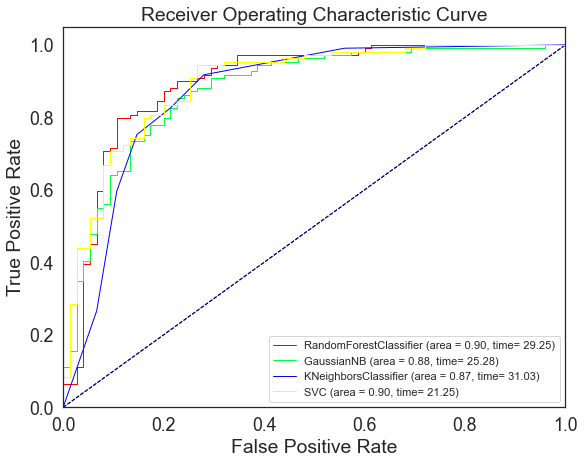

In [32]:
# Đường cong ROC của 4 mô hình
fig

Chỉ số AUC khi đánh giá trên tập kiểm định là kết quả cuối cùng để lựa chọn mô hình. Cả 2 thuật toán Random Forrest Classifier và SVC đều có kết quả tương đương nhau tuy nhiên tốc độ của thuật tuán SVC cao hơn. Vậy căn cứ kết quả ở trên ta có thể lựa chọn thuật toán SVC với bộ tham số như sau:
- C: 1
- gamma: 0.01
- kernel: rbf
- probability: True


### 6.2 Điều chỉnh ngưỡng phù hợp với tình hình thực tế <a name=adjust_threshold></a>

Trong y tế thì các chẩn đoán về tình trạng bệnh lý đều cần có sự xác nhận và kết luận của bác sĩ. Thuật toán học máy này sẽ hỗ trợ bác sĩ trong khâu sàng lọc ban đầu vì vậy đòi hỏi thuật toán này có khả năng xác định được dương tính đúng cao (hay còn gọi bởi các tên khác là: độ nhạy hoặc tỉ lệ phân loại dương tính đúng hoặc recall). Hay còn nói cách khác là "bắt nhầm hơn bỏ sót".   
Trong mô hình độ nhạy cao sẽ có điểm yếu là dương tính giả (false poisitive) cao tuy nhiên các bệnh nhân được mô hình xác định dương tính (cả giả hay thật) đều được bác sĩ khám và xác định lại kỹ lưỡng.  

In [33]:
# Xây dựng lại mô hình cuối cùng với các tham số đã xác định ở trên
final_svc= SVC(C= 1, kernel= 'rbf', gamma= 0.01, probability= True)
final_classify= Pipeline(steps=[
                                ('preprocess', preprocessor),
                                ('scale', scaler),
                                ('clf', final_svc)
                                ])
final_classifier= final_classify.fit(X_train, y_train)

In [49]:
# Lưu lại mô hình
from pickle import  dump, load
model_filename= 'svc_pipeline.pkl'
dump(final_classifier, open(model_filename, 'wb'))

In [37]:
# Dự đoán xác suất bị bệnh
pos_label= 'Bị bệnh'
pos_index= np.where(final_classifier.classes_ == pos_label)[0][0]
neg_index= np.where(final_classifier.classes_ != pos_label)[0][0]
neg_label= final_classifier.classes_[neg_index]
# Dự đoán xác xuất
y_predict_proba= final_classifier.predict_proba(X_test)
# Tách xác xuất dương tính
pos_proba= y_predict_proba[:, pos_index]

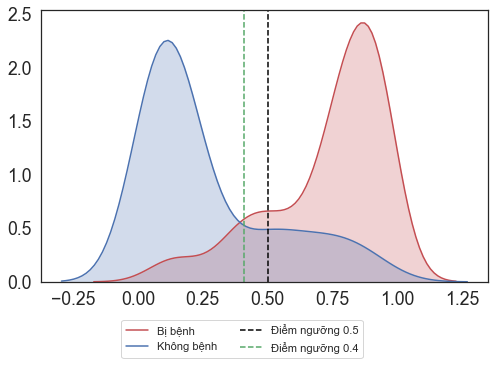

In [38]:
# Trực quan phân phối xác suất bị bệnh để điều chỉnh điểm ngưỡng
plt.figure(figsize= (8, 5))
sb.distplot(pos_proba[y_test== pos_label], label= pos_label,
            color= 'r', kde_kws={"shade": True}, hist=False, norm_hist= True)
sb.distplot(pos_proba[y_test== neg_label], label= neg_label,
            color= 'b', kde_kws={"shade": True}, hist=False, norm_hist= True)
plt.axvline(x= 0.5, linestyle= '--', color= 'black', label= 'Điểm ngưỡng 0.5')
plt.axvline(x= 0.41, linestyle= '--', color= 'g', label= 'Điểm ngưỡng 0.4', )
plt.legend(fontsize= 'xx-small', bbox_to_anchor=(0.3, -0.3, 0.3, 0.2),
           ncol=2, loc='lower center')
plt.show()

In [39]:
def predict(classifier, x, pos_label, threshold= 0.5):
  pos_index= np.where(classifier.classes_ == pos_label)[0][0]
  neg_index= np.where(classifier.classes_ != pos_label)[0][0]
  neg_label= classifier.classes_[neg_index]
  predict_proba= classifier.predict_proba(x)
  pos_proba= predict_proba[:, pos_index]
  return np.array(np.where(pos_proba >= threshold, pos_label, neg_label), dtype=object)

def confusion_plot(y_true, y_pred, normalize= False):
  df= pd.DataFrame()
  df['True']= pd.Series(np.array(y_true))
  df['Predict']= pd.Series(np.array(y_pred))
  sb.heatmap(pd.crosstab(df['True'], df['Predict'], normalize= normalize), annot=True, cbar= False)

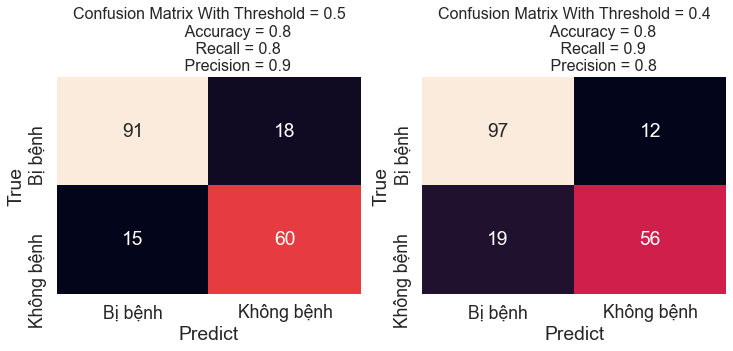

In [40]:
from sklearn.metrics import recall_score, precision_score, accuracy_score
plt.figure(figsize= (12, 4))
plt.subplot(121)
y_pred_05= predict(classifier= final_classifier, x= X_test,
                      pos_label= 'Bị bệnh', threshold= 0.5)
acc_05= accuracy_score(y_true= y_test, y_pred= y_pred_05)
recall_05= recall_score(y_true= y_test, y_pred= y_pred_05, pos_label= 'Bị bệnh')
precision_05= precision_score(y_true= y_test, y_pred= y_pred_05, pos_label= 'Bị bệnh')
title= '''Confusion Matrix With Threshold = 0.5
             Accuracy = {:.1f}
             Recall = {:.1f}
             Precision = {:.1f}'''
plt.title(title.format(acc_05, recall_05, precision_05),fontsize= 16)
confusion_plot(y_true= y_test, y_pred= y_pred_05)
plt.subplot(122)
y_pred_04= predict(classifier= final_classifier, x= X_test,
                      pos_label= 'Bị bệnh', threshold= 0.4)
acc_04= accuracy_score(y_true= y_test, y_pred= y_pred_04)
recall_04= recall_score(y_true= y_test, y_pred= y_pred_04, pos_label= 'Bị bệnh')
precision_04= precision_score(y_true= y_test, y_pred= y_pred_04, pos_label= 'Bị bệnh')
plt.title(title.format(acc_04, recall_04, precision_04), fontsize= 16)
confusion_plot(y_true= y_test, y_pred= y_pred_04)
plt.show()

## 7. Kết luận <a name=conclusion></a>

Với việc điều chỉnh ngưỡng từ 0,5 xuống 0,4 ta đã tăng được độ nhạy (recall) của mô hình từ 0,8 lên 0,9. Vậy mô hình có khả năng xác định đúng được 90% người bị bệnh và nói cách khác là còn 10% người bị bệnh nhưng chưa được xác định. Chính vì độ nhạy cao (bắt nhầm hơn bỏ sót) mà trong số những dự đoán bị bệnh thì sẽ có 80% thật sự bị bệnh và 20% còn lại là không thật sự bị bệnh.  
Đồ án này đã bước đầu xây dựng được công cụ giúp sàng lọc được các bệnh nhân bị bệnh nhân mắc bệnh tim. Tuy nhiên kết quả còn có một số điểm yếu là độ nhạy (recall) của mô hình chỉ đạt 90% và độ chính xác (precision) 80% là chưa thực sự cao.  
Điểm yếu này có khả năng khác phục nếu như dữ liệu về bệnh nhân được thu thập một cách hệ thống và đầy đủ hơn.
